<h1 align='center'> MNIST </h1>

<p align='justify'> The MNIST dataset, which stands for the Modified National Institute of Standards and Technology database, is a widely used dataset in the field of machine learning and image processing. It consists of a collection of handwritten digits from 0 to 9, with a total of 70,000 images. The dataset is divided into a training set of 60,000 examples and a test set of 10,000 examples. Each image is a grayscale image with a size of 28x28 pixels. </p>

## Setting up

In [387]:
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.optim import SGD
from tqdm import tqdm
import torch.nn as nn
import numpy as np
import torchvision
import torch

%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {str.upper(device)} device 🌟')

x, y = torch.load('./data/MNIST/processed/training.pt')
print(x.shape, y.shape)

Using CUDA device 🌟
torch.Size([60000, 28, 28]) torch.Size([60000])


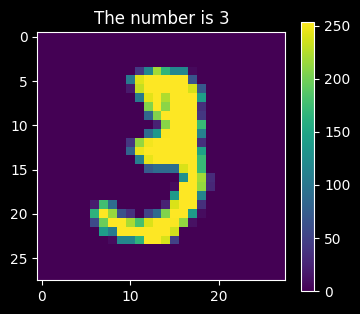

In [388]:
fig = plt.figure(figsize=(4, 3.5))

def show_number(i: int = 0):
    plt.style.use('dark_background') 
    plt.imshow(x[i].numpy())
    plt.title(f'The number is {y[i].numpy()}')
    plt.colorbar()

    plt.show()
            
show_number(10)

## One Hot Encoder

In [389]:
y_original = torch.tensor([2, 4, 3, 0, 1])
y_original

tensor([2, 4, 3, 0, 1])

In [390]:
y_new = F.one_hot(y_original)
y_new

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

In [391]:
y_new = F.one_hot(y, num_classes=10)
y_new.shape

torch.Size([60000, 10])

In [392]:
x.view(-1, 28 ** 2).shape

torch.Size([60000, 784])

## Pytorch Dataset class

In [393]:
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    
    def __len__(self): 
        return self.x.shape[0]
    
    def __getitem__(self, ix): 
        return self.x[ix], self.y[ix]

train_ds = CTDataset('./data/MNIST/processed/training.pt')
test_ds = CTDataset('./data/MNIST/processed/test.pt')

## Pytorch DataLoader object

<p align='justify'> We can put the <code>Dataset</code> objects inside a <code>DataLoader</code> class. This is useful because we can specify a <code>batch_size</code>. Each iteration through the dataloader will yield a tensor where the first dimention is equal to the <code>batch_size</code>. </p>

In [394]:
train_dl = DataLoader(train_ds, batch_size=5)

for x, y in train_dl:
    x = x.to(device)
    y = y.to(device)
    print(x.shape)
    print(y.shape)
    break    
    
print(f'\n{len(train_dl)}')

torch.Size([5, 28, 28])
torch.Size([5, 10])

12000


## Cross Entropy Loss

In [395]:
L = nn.CrossEntropyLoss().to(device)
L

CrossEntropyLoss()

## The neural network

In [396]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
        
    def forward(self,x):
        x = x.view(-1,28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        
        output = x.squeeze()
        
        return output.argmax(axis = 1)

model = NumberClassifier().to(device)
model

NumberClassifier(
  (Matrix1): Linear(in_features=784, out_features=100, bias=True)
  (Matrix2): Linear(in_features=100, out_features=50, bias=True)
  (Matrix3): Linear(in_features=50, out_features=10, bias=True)
  (R): ReLU()
)

In [397]:
xs, ys = train_ds[0:4]

model(xs.to(device))

tensor([[ 0.1199, -0.1392,  0.0376, -0.1706, -0.0929, -0.0561,  0.0949,  0.0934,
          0.1235, -0.0219],
        [ 0.1770, -0.0922,  0.0742, -0.2017, -0.0906, -0.1107,  0.1572,  0.1218,
          0.1331, -0.0142],
        [ 0.1016, -0.1504,  0.0648, -0.1879, -0.0786, -0.0332,  0.1565,  0.0761,
          0.1249,  0.0330],
        [ 0.1275, -0.1498,  0.0907, -0.1498, -0.0646, -0.0314,  0.0814,  0.0974,
          0.1031,  0.0346]], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [398]:
L(f(xs), ys)

tensor(2.2865, dtype=torch.float64, grad_fn=<DivBackward1>)

## Training

In [401]:
def train_model(dl, f, n_epochs=30):
    opt = SGD(f.parameters(), lr=1e-2)
    L = nn.CrossEntropyLoss()

    losses = []
    epochs = []
    
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
                
        for i, (x, y) in enumerate(dl):
            x = x.to(device)
            y = y.to(device)
            opt.zero_grad() 
            loss_value = L(f(x), y) 
            
            if loss_value > torch.max(true).item():
                torch.save(model.state_dict(), './data/models/mnist_model.pth')
            
            loss_value.backward() 
            opt.step() 

            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
            
    return np.array(epochs), np.array(losses)

epoch_data, loss_data = train_model(train_dl, model)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


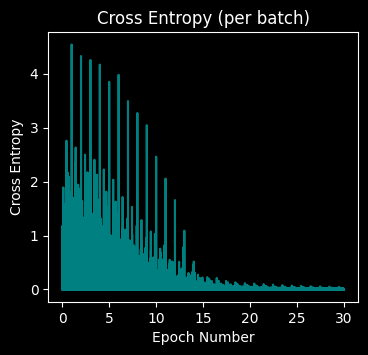

In [402]:
fig = plt.figure(figsize=(4, 3.5))

plt.plot(epoch_data, loss_data, color='teal')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (per batch)')

plt.show()

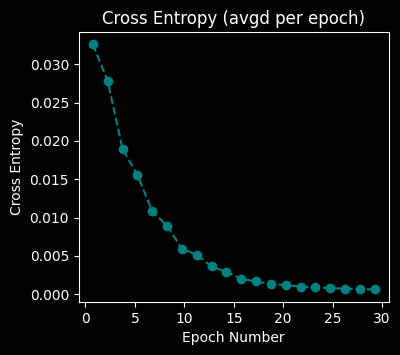

In [403]:
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

fig = plt.figure(figsize=(4, 3.5))

plt.plot(epoch_data_avgd, loss_data_avgd, 'o--', color='teal')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')

plt.show()

In [404]:
y_sample = train_ds[0][1]
y_sample

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [405]:
x_sample = train_ds[0][0]
yhat_sample = model(x_sample.to(device))
torch.argmax(yhat_sample)

tensor(5, device='cuda:0')

In [406]:
xs, ys = train_ds[0: 2000]
xs = xs.to(device)
ys = ys.to(device)

yhats = model(xs).argmax(axis = 1)

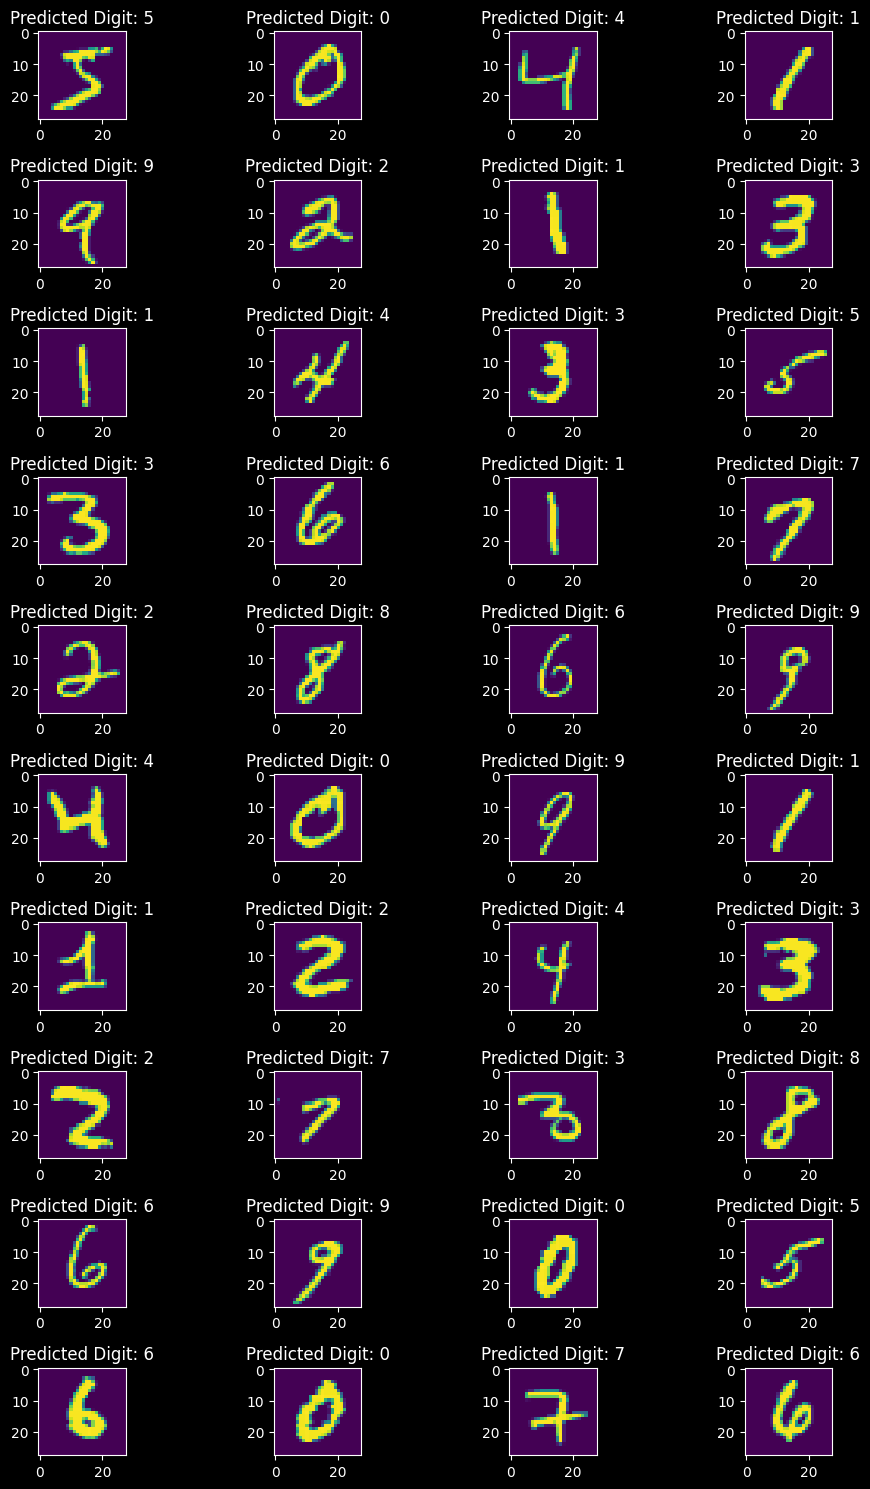

In [407]:
fig, aux = plt.subplots(10, 4, figsize=(10, 15))

for i in range(40):
    plt.subplot(10, 4, i + 1)
    plt.imshow(xs.to('cpu')[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
    
fig.tight_layout()

plt.show()

# Testing

In [408]:
xs, ys = test_ds[:2000]
yhats = model(xs.to(device)).argmax(axis = 1)

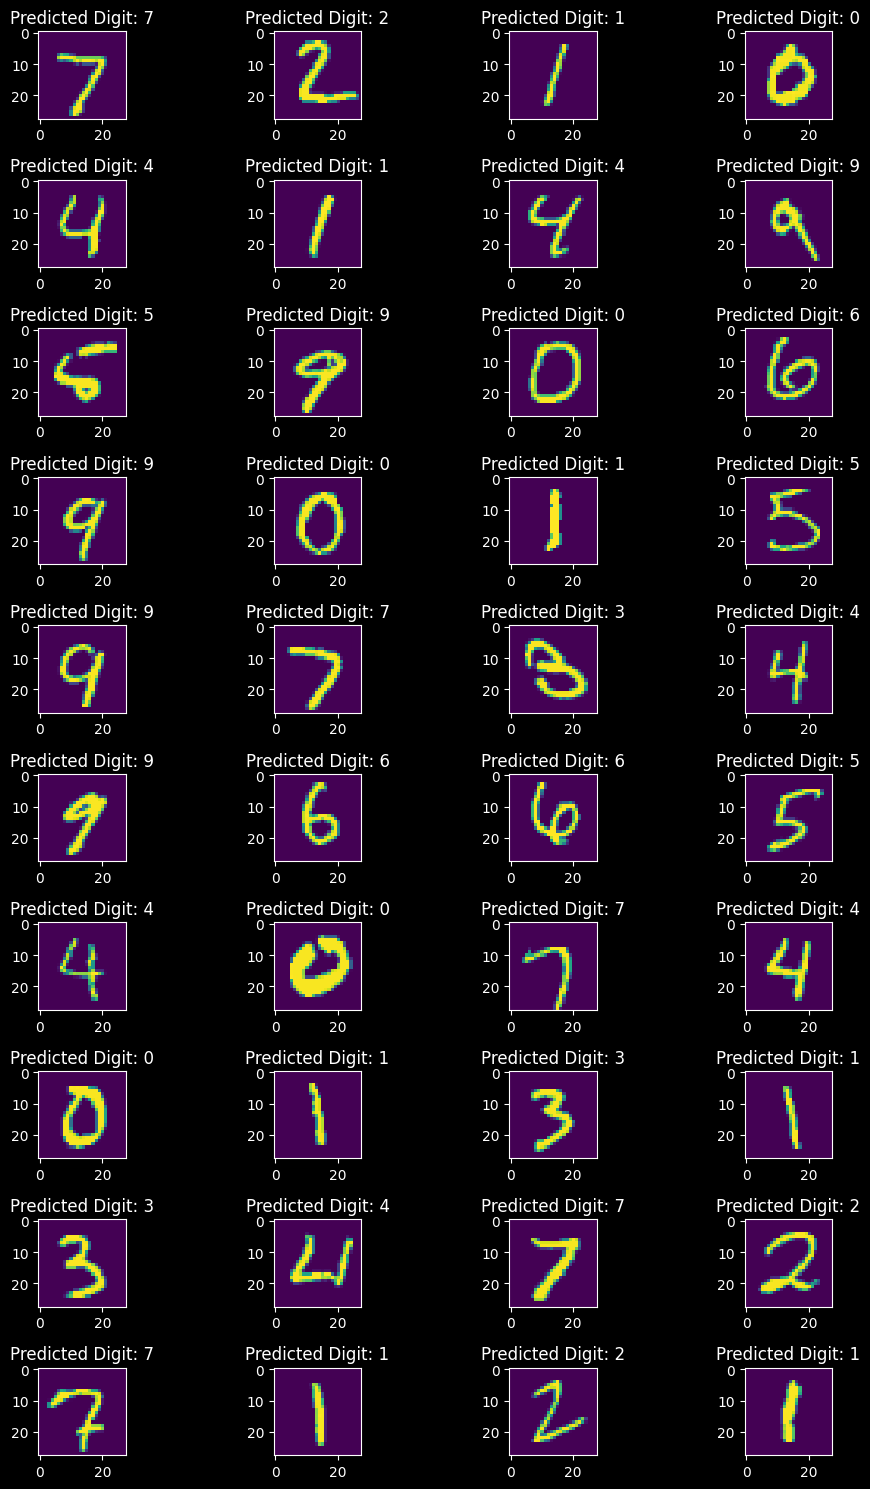

In [409]:
fig, aux = plt.subplots(10, 4, figsize=(10, 15))

for i in range(40):
    plt.subplot(10, 4, i + 1)
    plt.imshow(xs.to('cpu')[i])
    plt.title(f'Predicted Digit: {yhats[i]}')
    
fig.tight_layout()

plt.show()

## Confusion Matrix

In [410]:
images, true = test_ds[:]
predictions = model(images.to(device)).argmax(axis = 1)
true = torch.argmax(true, dim=1)

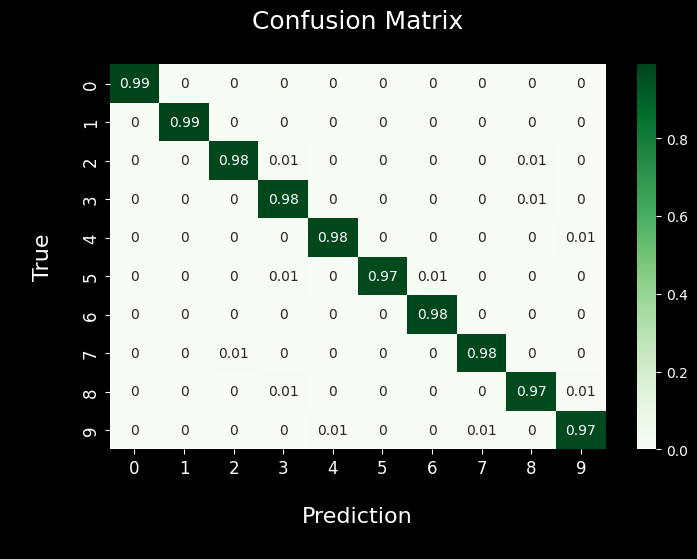

In [411]:
from sklearn.metrics import confusion_matrix
import plotly.express as px
import seaborn as sns

scm = confusion_matrix(true.tolist(), predictions.tolist())
scm_normalized = np.round(scm/np.sum(scm, axis=1).reshape(-1, 1), 2)

plt.figure(figsize=(8, 5))

sns.heatmap(
    scm_normalized, 
    cmap='Greens', 
    annot=True, 
    cbar_kws={
        'orientation': 'vertical'
    }
)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title('Confusion Matrix\n', fontsize=18)
plt.xlabel('\nPrediction\n', fontsize=16)
plt.ylabel('\nTrue\n', fontsize=16)

plt.show()